In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

In [34]:
X_train = pd.read_csv('X_train_w_ID.csv', index_col=0)

In [35]:
X_train.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
85118,C435ECB1AD38113E,0,1,44,2,2,2,2,2,2,...,0.100000,1.666667,195.666667,2.566667,0.900000,56.000000,0.100000,18.666667,216.000000,3
100549,E82E0508E4DFD4F7,1,1,49,2,2,2,2,2,2,...,0.133333,2.333333,13.000000,0.366667,0.100000,3.000000,0.033333,1.666667,250.333333,3
66399,98FEFC9C49CE5DC3,1,1,37,2,2,2,2,2,2,...,4.000000,576.333333,91.666667,1.433333,0.433333,13.666667,0.133333,35.333333,703.333333,2
58102,85C27C29550C7734,1,1,39,2,2,1,2,2,2,...,0.000000,0.000000,119.523810,1.000000,0.095238,3.333333,0.047619,9.523810,129.047619,3
12442,1D066725801F0370,1,1,45,1,1,1,1,1,1,...,1.033333,44.666667,548.666667,4.233333,0.900000,85.000000,0.666667,229.666667,2689.666667,4


In [36]:
X_test = pd.read_csv('X_test_w_ID.csv', index_col = 0)

In [37]:
Y_train = pd.read_csv('Y_train.csv', index_col = 0, header= None, names = ['Y'])
Y_test = pd.read_csv('Y_test.csv', index_col = 0, header= None, names = ['Y'])

In [38]:
Y_train.head()

,Y
85118,0
100549,0
66399,0
58102,1
12442,0


In [39]:
Y_test.head()

,Y
14272,0
21335,0
14351,1
65200,0
54976,0


In [40]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BENE_SEX_IDENT_CD,83270.0,0.556347,0.496818,0.000000,0.000000,1.000000,1.000000,1.000000
BENE_RACE_CD,83270.0,1.281818,0.751701,1.000000,1.000000,1.000000,1.000000,5.000000
SP_STATE_CODE,83270.0,25.698451,15.519329,1.000000,11.000000,25.000000,39.000000,54.000000
SP_ALZHDMTA,83270.0,1.831824,0.374025,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CHF,83270.0,1.741864,0.437612,1.000000,1.000000,2.000000,2.000000,2.000000
SP_CHRNKIDN,83270.0,1.861931,0.344974,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CNCR,83270.0,1.948157,0.221712,1.000000,2.000000,2.000000,2.000000,2.000000
SP_COPD,83270.0,1.910820,0.285005,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DEPRESSN,83270.0,1.820079,0.384124,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DIABETES,83270.0,1.707578,0.454878,1.000000,1.000000,2.000000,2.000000,2.000000


In [41]:
#prevent data leakage
train_X = X_train.drop(['DESYNPUF_ID'], axis=1)
test_X = X_test.drop(['DESYNPUF_ID'], axis=1)

In [42]:
#Add Y variable for data analysis
train_X['Y'] = Y_train

In [43]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
14272,0,1,18,2,2,2,2,2,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
21335,0,1,10,2,2,2,2,2,2,2,...,2.066667,120.666667,3.666667,0.100000,0.000000,0.000000,0.000000,0.000000,124.333333,3
14351,1,1,42,1,2,1,2,2,2,1,...,0.526316,15.263158,29.473684,0.526316,0.000000,0.000000,0.105263,114.736842,159.473684,3
65200,0,1,6,1,2,2,2,2,2,2,...,0.133333,15.000000,149.000000,1.766667,0.333333,23.333333,0.300000,68.333333,232.333333,3
54976,0,1,6,2,1,2,2,2,2,1,...,2.200000,145.666667,280.000000,3.200000,1.133333,117.333333,0.566667,182.666667,775.000000,2


Variable descriptions:

Sex_Ident: 1 = Male, 2= Female
Race: 1 = White, 2 = Black, 3 = Others, 4 = Hispanic
Binary variables: 1 = Yes, 2 = No 


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


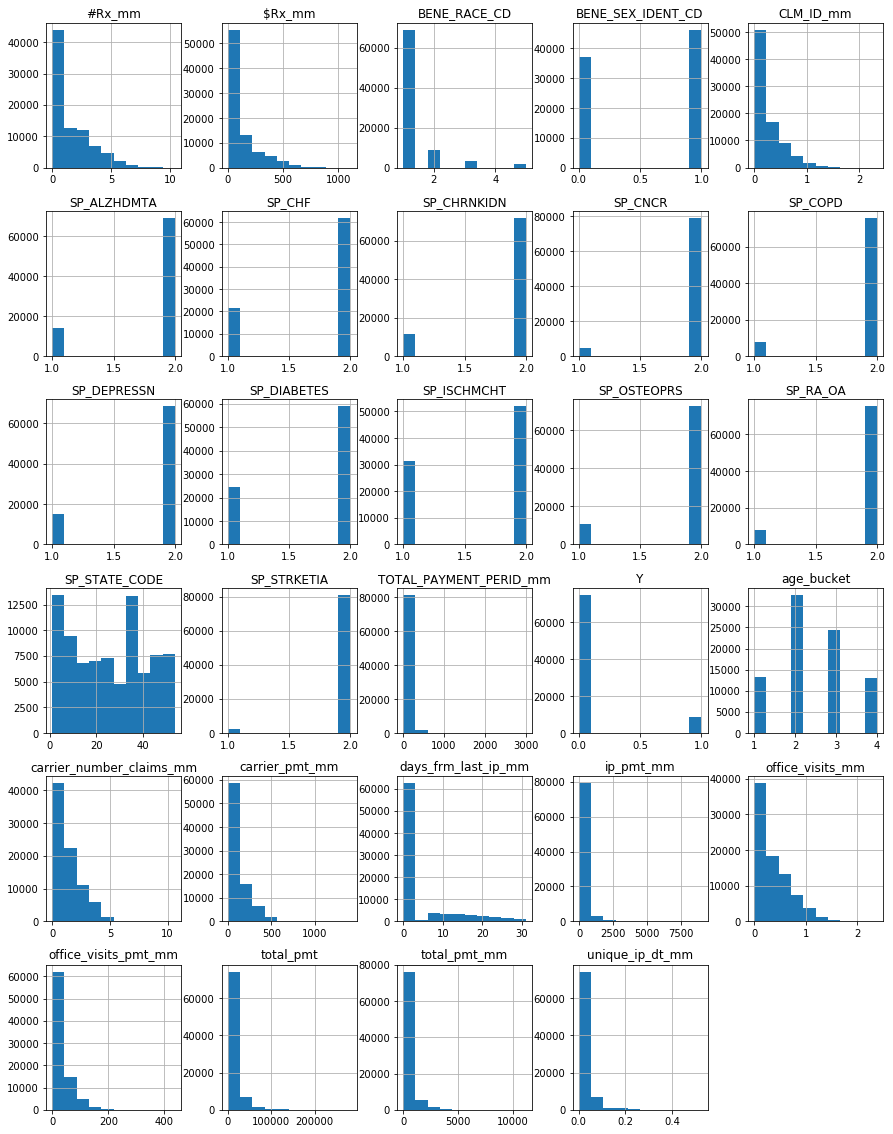

In [44]:
#Plot histograms of all features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_X.hist(ax = ax)
plt.show()

In [45]:
#Correlations with target variable
c_mat = train_X.corr()
print(c_mat['Y'].sort_values(ascending=False))

Y                           1.000000
carrier_number_claims_mm    0.208634
office_visits_mm            0.194077
carrier_pmt_mm              0.188534
office_visits_pmt_mm        0.163429
CLM_ID_mm                   0.158336
total_pmt_mm                0.119805
TOTAL_PAYMENT_PERID_mm      0.108956
$Rx_mm                      0.069945
unique_ip_dt_mm             0.068527
#Rx_mm                      0.062136
ip_pmt_mm                   0.052877
total_pmt                   0.035185
age_bucket                  0.019349
BENE_SEX_IDENT_CD           0.009952
SP_STATE_CODE               0.001219
BENE_RACE_CD               -0.017293
days_frm_last_ip_mm        -0.039844
SP_OSTEOPRS                -0.093482
SP_RA_OA                   -0.099963
SP_CNCR                    -0.103176
SP_STRKETIA                -0.132962
SP_DEPRESSN                -0.146510
SP_ALZHDMTA                -0.161662
SP_CHF                     -0.214455
SP_ISCHMCHT                -0.220880
SP_DIABETES                -0.225862
S

In [46]:
train_X.Y.groupby(train_X.BENE_RACE_CD).sum()

BENE_RACE_CD
1    7328
2     825
3     293
5     172
Name: Y, dtype: int64

Because our features show 2 for not having the disease, the correlations revealed a positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

Outside of the condition features, number of inpatient hospitalizations had the strongest correlation with the target variable at 0.47%. Having been hospitalized in the past leads to a higher likelihood of hospitalization in the future.

Number of carrier claims have a 20% correlation with hospitalization.

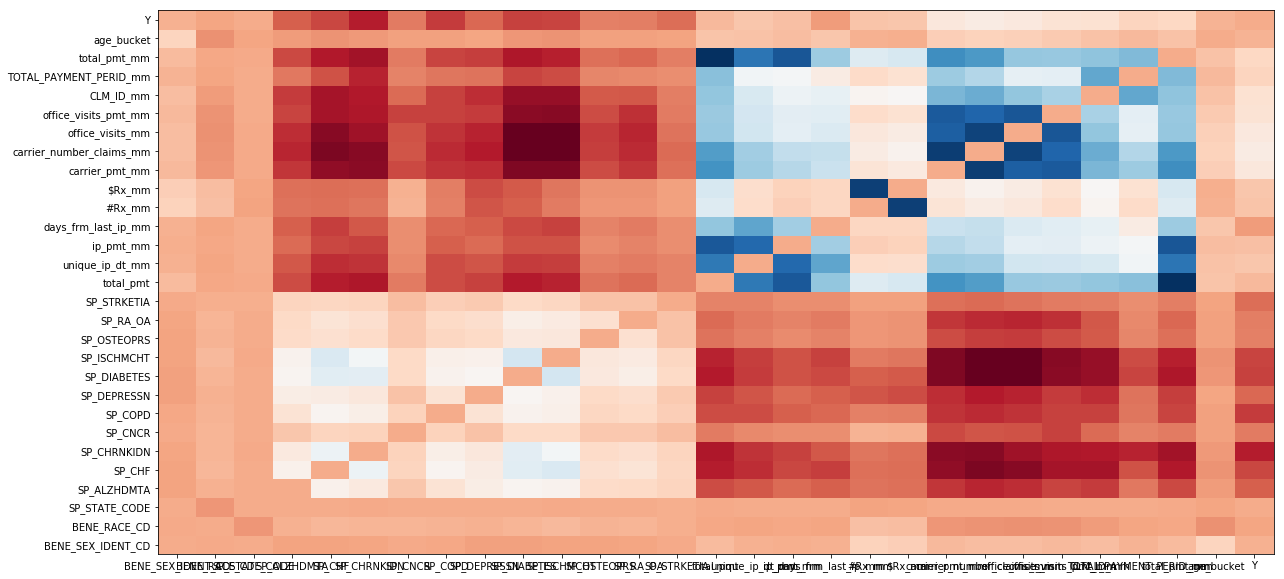

In [47]:
#Visualize correlations. Red signifies the strongest negative correlations

for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0
 
    
fig, ax = plt.subplots(figsize = (20,10))
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

heatmap.set_label('Pearson Correlation')

plt.show()

In [48]:
#Normalize features

import sklearn.preprocessing as sk

labels = train_X.drop('Y', axis=1).columns
index = train_X.index

norm = pd.DataFrame(sk.scale(train_X.drop('Y', axis=1)), columns = labels, index = index)
#norm['Y'] =  working_data['Y']

index1 = test_X.index
norm_test = pd.DataFrame(sk.scale(test_X), columns = labels, index = index1)

norm.describe() 

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
count,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,...,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04
mean,-9.798548e-16,1.410730e-15,-6.151992e-17,-2.516730e-15,-1.385010e-15,9.333300e-16,-2.451447e-15,-8.406696e-16,8.159479e-16,1.078312e-15,...,2.745919e-16,5.939420e-16,-2.309483e-16,-2.896419e-17,-3.246006e-16,3.749826e-16,-2.244978e-17,-1.836461e-16,2.476169e-17,1.264526e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.119827e+00,-3.749093e-01,-1.591473e+00,-2.223996e+00,-1.695265e+00,-2.498551e+00,-4.276547e+00,-3.195826e+00,-2.134948e+00,-1.555543e+00,...,-8.791438e-01,-7.359539e-01,-8.794149e-01,-1.031734e+00,-1.038183e+00,-8.429186e-01,-8.533398e-01,-4.474225e-01,-7.188507e-01,-1.545235e+00
25%,-1.119827e+00,-3.749093e-01,-9.471118e-01,4.496411e-01,-1.695265e+00,4.002319e-01,2.338335e-01,3.129081e-01,4.683955e-01,-1.555543e+00,...,-8.397453e-01,-7.152778e-01,-8.112030e-01,-9.241460e-01,-9.395480e-01,-8.053465e-01,-8.533398e-01,-4.287711e-01,-5.765337e-01,-4.775262e-01
50%,8.929949e-01,-3.749093e-01,-4.500549e-02,4.496411e-01,5.898782e-01,4.002319e-01,2.338335e-01,3.129081e-01,4.683955e-01,6.428625e-01,...,-3.866619e-01,-4.786519e-01,-2.864966e-01,-1.979259e-01,-1.927365e-01,-3.169083e-01,-3.533455e-01,-2.958796e-01,-3.292929e-01,-4.775262e-01
75%,8.929949e-01,-3.749093e-01,8.571008e-01,4.496411e-01,5.898782e-01,4.002319e-01,2.338335e-01,3.129081e-01,4.683955e-01,6.428625e-01,...,6.180013e-01,3.607079e-01,3.929982e-01,5.820884e-01,6.386198e-01,4.063559e-01,5.216445e-01,9.346908e-02,1.847223e-01,5.901825e-01
max,8.929949e-01,4.946384e+00,1.823643e+00,4.496411e-01,5.898782e-01,4.002319e-01,2.338335e-01,3.129081e-01,4.683955e-01,6.428625e-01,...,5.260465e+00,6.923376e+00,1.019451e+01,7.547007e+00,6.007208e+00,1.147762e+01,7.896560e+00,2.060931e+01,1.797534e+01,1.657891e+00


In [49]:
norm.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
85118,-1.119827,-0.374909,1.179282,0.449641,0.589878,0.400232,0.233833,0.312908,0.468395,-1.555543,...,-0.820046,-0.724467,0.660599,1.039338,1.624975,0.735112,-0.478344,-0.298211,-0.357198,0.590182
100549,0.892995,-0.374909,1.501462,0.449641,0.589878,0.400232,0.233833,0.312908,0.468395,0.642863,...,-0.800347,-0.719872,-0.777097,-0.735867,-0.742277,-0.758381,-0.728341,-0.417114,-0.299713,0.590182
66399,0.892995,-0.374909,0.728228,0.449641,0.589878,0.400232,0.233833,0.312908,0.468395,-1.555543,...,1.484770,3.236146,-0.157944,0.124839,0.244078,-0.457804,-0.353346,-0.181640,0.458752,-0.477526
58102,0.892995,-0.374909,0.857101,0.449641,0.589878,-2.498551,0.233833,0.312908,0.468395,0.642863,...,-0.879144,-0.735954,0.061309,-0.224823,-0.756368,-0.748988,-0.674770,-0.362159,-0.502784,0.590182
12442,0.892995,-0.374909,1.243718,-2.223996,-1.695265,-2.498551,-4.276547,-3.195826,-2.134948,-1.555543,...,-0.268466,-0.428110,3.438919,2.384190,1.624975,1.552307,1.646632,1.177584,3.784504,1.657891


In [50]:
#Split dataset into testing and training

#train_Y = norm.pop('Y')
train_X = norm
test_X = norm_test

test_Y = Y_test
train_Y = Y_train



In [51]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
14272,-1.128076,-0.382841,-0.501575,0.448537,0.588375,0.404500,0.232372,0.311075,0.461975,0.635774,...,-0.880829,-0.739204,-0.878708,-1.028512,-1.034625,-0.842150,-0.848490,-0.438291,-0.721303,0.595844
21335,-1.128076,-0.382841,-1.016940,0.448537,0.588375,0.404500,0.232372,0.311075,0.461975,0.635774,...,0.336274,0.092133,-0.849513,-0.947078,-1.034625,-0.842150,-0.848490,-0.438291,-0.511735,0.595844
14351,0.886465,-0.382841,1.044522,-2.229469,0.588375,-2.472187,0.232372,0.311075,0.461975,-1.572885,...,-0.570871,-0.634048,-0.644027,-0.599912,-1.034625,-0.842150,-0.454338,0.395053,-0.452505,0.595844
65200,-1.128076,-0.382841,-1.274623,-2.229469,0.588375,0.404500,0.232372,0.311075,0.461975,0.635774,...,-0.802307,-0.635861,0.307687,0.410155,-0.042343,-0.180679,0.274842,0.058020,-0.329697,0.595844
54976,-1.128076,-0.382841,-1.274623,0.448537,-1.699595,0.404500,0.232372,0.311075,0.461975,-1.572885,...,0.414797,0.264371,1.350759,1.577377,2.339133,2.484105,1.273360,0.888433,0.584987,-0.480273


In [52]:
#Base Rate: predicting negative all the time
share_non_target = train_Y[train_Y.Y == 0].shape[0]/train_Y.shape[0]

base_rate = share_non_target

print('Base rate of forecast represented by always predicting not being hospitalized is: ', str(base_rate))

Base rate of forecast represented by always predicting not being hospitalized is:  0.8965053440614867


In [53]:
train_X.isnull().any()

BENE_SEX_IDENT_CD           False
BENE_RACE_CD                False
SP_STATE_CODE               False
SP_ALZHDMTA                 False
SP_CHF                      False
SP_CHRNKIDN                 False
SP_CNCR                     False
SP_COPD                     False
SP_DEPRESSN                 False
SP_DIABETES                 False
SP_ISCHMCHT                 False
SP_OSTEOPRS                 False
SP_RA_OA                    False
SP_STRKETIA                 False
total_pmt                   False
unique_ip_dt_mm             False
ip_pmt_mm                   False
days_frm_last_ip_mm         False
#Rx_mm                      False
$Rx_mm                      False
carrier_pmt_mm              False
carrier_number_claims_mm    False
office_visits_mm            False
office_visits_pmt_mm        False
CLM_ID_mm                   False
TOTAL_PAYMENT_PERID_mm      False
total_pmt_mm                False
age_bucket                  False
dtype: bool

In [54]:
train_Y.shape[0]

83270

In [55]:
train_X.shape[0]

83270

In [56]:
#Let's test features with a decision tree

from sklearn import tree

#Create a Decision Tree instance
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Train decision tree
clf.fit(train_X, train_Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [57]:
labels = train_X.columns
labels

Index(['BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'total_pmt', 'unique_ip_dt_mm', 'ip_pmt_mm', 'days_frm_last_ip_mm',
       '#Rx_mm', '$Rx_mm', 'carrier_pmt_mm', 'carrier_number_claims_mm',
       'office_visits_mm', 'office_visits_pmt_mm', 'CLM_ID_mm',
       'TOTAL_PAYMENT_PERID_mm', 'total_pmt_mm', 'age_bucket'],
      dtype='object')

[ 0.00079848  0.00068428  0.00533275  0.00189277  0.00559383  0.09783984
  0.00256968  0.02358968  0.00238274  0.01351773  0.01599052  0.00103415
  0.00146819  0.00274673  0.21916328  0.17128166  0.00156912  0.04893754
  0.03609322  0.00804665  0.00641978  0.00981564  0.09047765  0.00551655
  0.0100207   0.00818135  0.20701184  0.00202363]


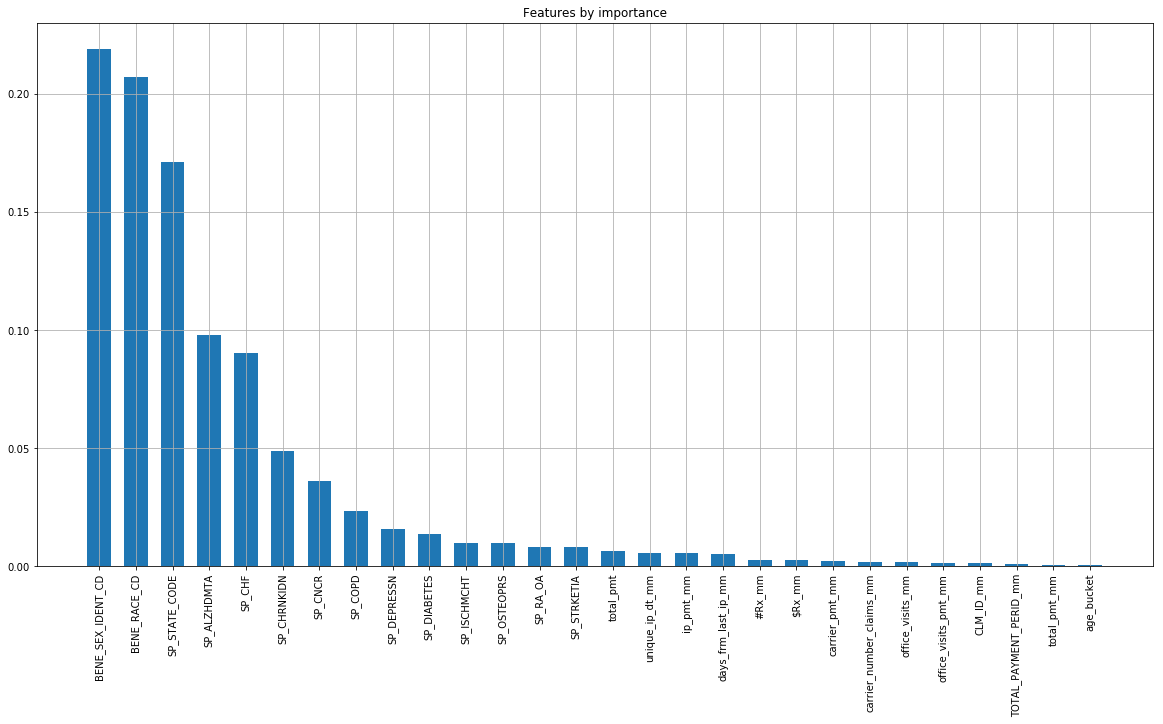

In [58]:
#Visualize feature importance
import matplotlib.pyplot as plt
%matplotlib inline

importances = clf.feature_importances_
#print(len(importances))

labels = train_X.columns

assert(len(importances) == len(labels))

print(importances)

#Sort and order importances in descending order
importances.sort()
importances = importances[::-1]

N = len(importances)
xx = np.linspace(0, 1, N)
plt.figure(figsize=(20,10))
plt.bar(xx, importances, width=1/N/1.5)
plt.xticks(xx, labels, rotation='vertical')
plt.title('Features by importance')

plt.grid(True)

In [59]:
from sklearn import metrics

#Predicting train_df
fcst_train = clf.predict(train_X)

#Predicting test_df
fcst_test = clf.predict(test_X)

train_accuracy = clf.score(train_X, train_Y)
test_accuracy = clf.score(test_X, test_Y)

print('Train accuracy:',train_accuracy, '\nTest accuracy:', test_accuracy, '\nDifference:', 
     train_accuracy - test_accuracy)

Train accuracy: 0.999939954365 
Test accuracy: 0.817667615376 
Difference: 0.182272338989


In [60]:
#Tune the decision tree by testing hyperparameters
min_samples_split_values = np.linspace(200, 1000, 10, dtype = int)
min_samples_leaf_values = np.linspace(50, 200, 10, dtype = int)

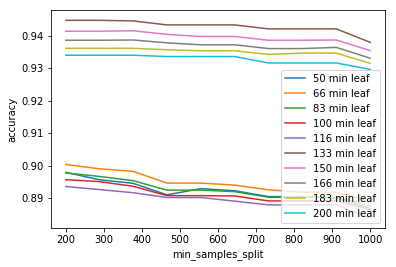

In [61]:
import matplotlib.pyplot as plt

for leaf in min_samples_leaf_values:
    accuracy = []
    
    for split in min_samples_split_values:
        
        clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
        
        clf.fit(train_X, train_Y)
        
        fcst_tests = clf.predict(test_X)
        
        accuracy.append(metrics.accuracy_score(test_Y, fcst_tests))
 
    plt.plot(min_samples_split_values, accuracy, label = str(leaf) + ' min leaf')
    plt.xlabel('min_samples_split')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

In [62]:
index_max_accuracy = accuracy.index(max(accuracy))

best_samples_split = min_samples_split_values[index_max_accuracy]
best_min_leaf = min_samples_leaf_values[index_max_accuracy]
best_accuracy = accuracy[index_max_accuracy]

print('Best Min Samples Split: ' + str(best_samples_split) + '\nBest Min Leaf: ' + str(best_min_leaf) 
      + '\nBest Accuracy: ' + str(best_accuracy))

Best Min Samples Split: 200
Best Min Leaf: 50
Best Accuracy: 0.933962604028


In [63]:
#We beat the base rate
print('{0:.5f}'.format((best_accuracy - base_rate)))

0.03746


In [64]:
fcst_tests.transpose()

array([0, 0, 1, ..., 1, 0, 0])

#### Conclusion

Conclusion: I analyzed demographics and health features for predicting hospitalization in the next 6 months. 
Correlation analysis revealed the strongest positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

Decision tree analysis uncovered the strongest non-linear relationships with such factors as Age, Gender, and Race.

We defined the base rate to be the share of all patients who weren't hospitalized in the next 6 months. The base rate is very high at around 90%. The decision tree could not outperform the base rate implying we need a different model and probably more inputs. 

Next I will look into inputs varying over time such as hospital visits and medication intake in the 6 months prior to hospitalization.